In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [303]:
def preprocess_data(df, color_mapping):
    df['color'] = df['color'].apply(lambda x: color_mapping.keys()[color_mapping.values().index(x)])
    X = df[['carat', 'cut_ord', 'clarity_ord']]
    try:
        y = df['price']
        return X, y
    except:
        return X

In [304]:
df_train = pd.read_csv('diamonds.csv', index_col=0)
df_test = pd.read_csv('new-diamonds.csv')

In [305]:
df_train.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
1,0.51,Premium,4,F,VS1,4,1749
2,2.25,Fair,1,G,I1,1,7069
3,0.70,Very Good,3,E,VS2,5,2757
4,0.47,Good,2,F,VS1,4,1243
5,0.30,Ideal,5,G,VVS1,7,789


In [306]:
i = 1
color_mapping = dict()
for val in pd.unique(sorted(df_train['color'])).tolist():
    color_mapping[i] = val
    i += 1

In [307]:
clarity_mapping = dict()
cut_mapping = dict()
for val in pd.unique(df_train[['clarity', 'clarity_ord']].values):
    clarity_mapping[val[1]] = val[0]
for val in pd.unique(df_train[['cut', 'cut_ord']].values):
    cut_mapping[val[1]] = val[0]
print clarity_mapping
print cut_mapping

{1L: 'I1', 2L: 'SI2', 3L: 'SI1', 4L: 'VS1', 5L: 'VS2', 6L: 'VVS2', 7L: 'VVS1', 8L: 'IF'}
{1L: 'Fair', 2L: 'Good', 3L: 'Very Good', 4L: 'Premium', 5L: 'Ideal'}


In [308]:
X_train, y_train = preprocess_data(df_train, color_mapping)
X_new = preprocess_data(df_test, color_mapping)

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
reg = LinearRegression()

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [313]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [314]:
y_pred = reg.predict(X_test)

In [315]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.88523739233589049

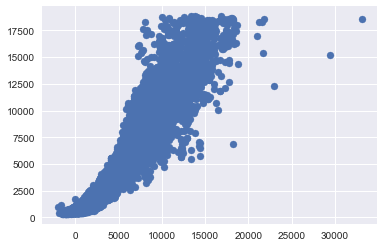

In [316]:
plt.scatter(x=y_pred, y=y_test)

In [317]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [318]:
print 'MSE: {}'.format(mean_squared_error(y_test, y_pred))
print 'MAE: {}'.format(mean_absolute_error(y_test, y_pred))

MSE: 1766439.67516
MAE: 899.579188088


In [336]:
y_new = pd.DataFrame(reg.predict(X_new), columns=['predicted_price'])
df_test = df_test.join(y_new)
df_test.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,predicted_price
0,1,1.22,Premium,4,4,SI1,3,6979.215480
1,2,1.01,Good,2,4,VS2,5,5830.034667
2,3,0.71,Very Good,3,6,VS2,5,3465.268947
3,4,1.01,Ideal,5,1,SI2,2,4911.425806
4,5,0.27,Ideal,5,5,VVS2,6,535.888508


array([1749, 7069, 2757, ..., 6619, 6787, 9428], dtype=int64)

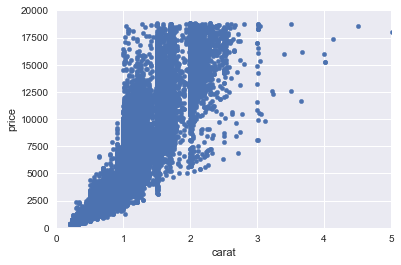

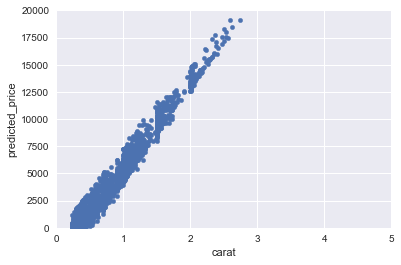

In [340]:
df_train.plot(kind='scatter', x='carat', y='price', xlim=[0,5], ylim=[0,20000])
df_test.plot(kind='scatter', x='carat', y='predicted_price', xlim=[0,5], ylim=[0,20000])

In [321]:
print reg.coef_
print reg.intercept_

[ 8388.50819198   151.78673723   457.98969103]
-5235.88053647
